<a href="https://colab.research.google.com/github/rutup25/Language-detection/blob/main/Language_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df= pd.read_csv("/content/Language Detection.csv")
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [ ]:
df.shape

(10271, 2)

In [ ]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [ ]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [ ]:
df["Language"].value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

In [ ]:
df1= df.copy()
df1['cleaned_Text']= ""
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [ ]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)

    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace

    return Text

In [ ]:
df1['cleaned_Text'] = df1['Text'].apply(lambda x: clean_function(x))
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [ ]:
X= df1["cleaned_Text"]
y= df1["Language"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

y= encoder.fit_transform(y)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CV= CountVectorizer()
X= CV.fit_transform(X).toarray()
X.shape

(10271, 39370)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'MNB' : MultinomialNB()
}

In [ ]:
for name, model in models.items():
    print(f'{name} training started...')
    model.fit(X_train, y_train)
    print(f'{name} trained')

K-Nearest Neighbors training started...
K-Nearest Neighbors trained
Random Forest training started...
Random Forest trained
MNB training started...
MNB trained


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as CM, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.537
Random Forest accuracy score :  0.933
MNB accuracy score :  0.98


In [ ]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.74      0.41      0.53       121
           1       0.80      0.53      0.64        85
           2       0.92      0.45      0.61       108
           3       0.98      0.61      0.75       290
           4       0.91      0.59      0.71       210
           5       0.82      0.42      0.55        86
           6       1.00      0.51      0.67        65
           7       1.00      0.25      0.40         8
           8       0.92      0.46      0.62       130
           9       0.09      0.96      0.17        70
          10       0.80      0.77      0.79       122
          11       0.92      0.52      0.66       139
          12       0.78      0.27      0.40       119
          13       0.79      0.53      0.63       160
          14       1.00      0.51      0.68       150
          15       0.29      0.90      0.44        86
       

K-Nearest Neighbors ConfusionMatrix


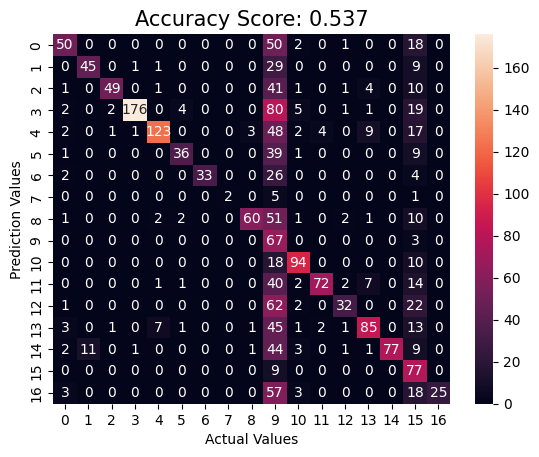

******************************
 
Random Forest ConfusionMatrix


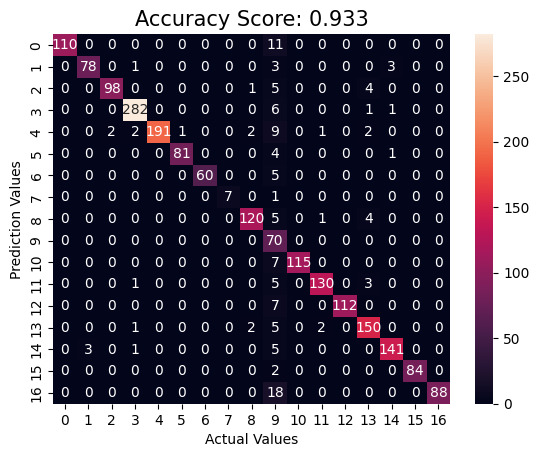

******************************
 
MNB ConfusionMatrix


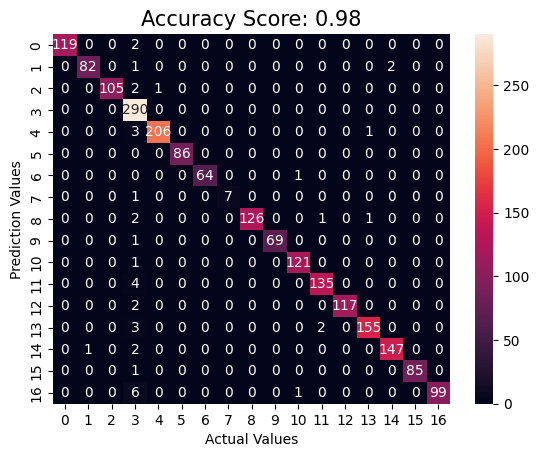

******************************
 


In [ ]:
for name in models:
    print(f'{name} ConfusionMatrix')
    predictions= models.get(name).predict(X_test)
    score = round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    confusionMatrix = CM(y_test, models.get(name).predict(X_test))
    sns.heatmap(confusionMatrix, annot=True, fmt=".0f")
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()
    print("******************************")
    print(" ")

In [ ]:
def prediction(text):
    x= CV.transform([text]).toarray()
    lang= model.predict(x)
    lang= encoder.inverse_transform(lang)
    print("This word/sentence contains {} word(s).".format(lang[0]))

In [ ]:
prediction("Pri unum aliquam definitionem ei, dicant reprehendunt cu nec. Intellegat accommodare ea usu. Ius illum delenit quaerendum ei, pri assum nobis id, iriure deseruisse deterruisset ad nam")

This word/sentence contains Italian word(s).


In [ ]:
prediction("Il lit de nombreux livres.")

This word/sentence contains French word(s).


In [ ]:
prediction("Ela se exercita todas as manhãs.")

This word/sentence contains Portugeese word(s).


In [ ]:
prediction("Hola")

This word/sentence contains Spanish word(s).


In [ ]:
prediction("उसके पास पैन था।")

This word/sentence contains Hindi word(s).
